In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = '/content/Mall_Customers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


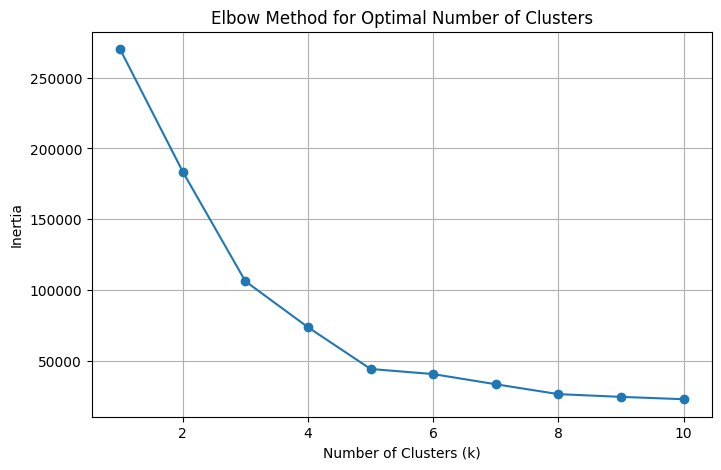

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Selecting features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Finding the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


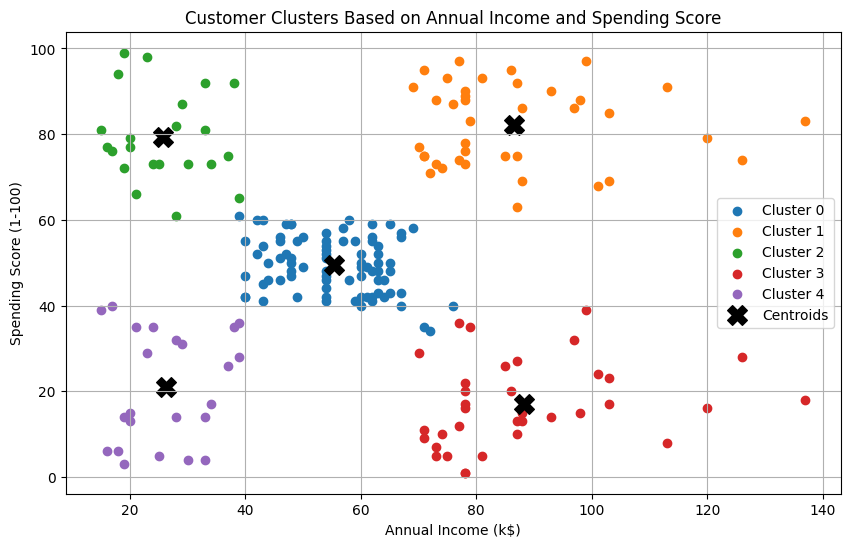

In [3]:
# Selecting the optimal number of clusters (k) based on the elbow method
optimal_k = 5  # Based on observation of the elbow curve

# Applying K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}')

# Plot cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title('Customer Clusters Based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [6]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')


In [7]:
# Select features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


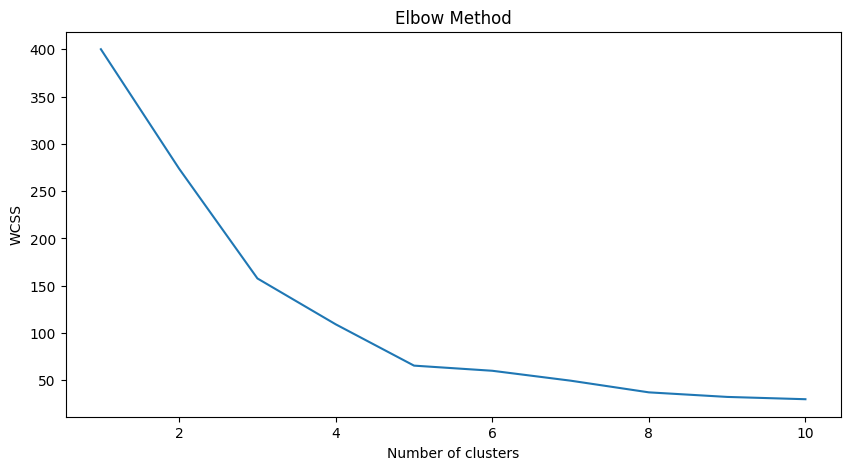

In [8]:
# Calculate WCSS (Within-cluster sum of squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [9]:
# Fit K-means with optimal clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster information to original data
data['Cluster'] = clusters


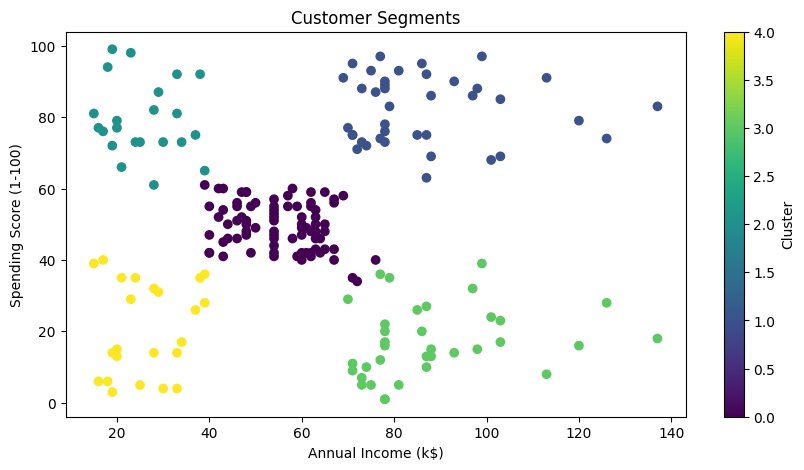

In [10]:
# Plotting the clusters
plt.figure(figsize=(10, 5))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()
